[IPython Notebook](RV.ipynb) |  [Python Script](RV.py)

RV Datasets and Options
============================

Setup
-----------------------------

As always, let's do imports and initialize a logger and a new Bundle.  See [Building a System](building_a_system.html) for more details.

In [1]:
%matplotlib inline

In [2]:
import phoebe
from phoebe import u # units
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe.logger(clevel='INFO')

b = phoebe.Bundle.default_binary()

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)
/usr/local/lib/python2.7/dist-packages/astropy/units/quantity.py:732: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  return super(Quantity, self).__eq__(other)


Dataset Parameters
--------------------------

Let's create the ParameterSets which would be added to the Bundle when calling add_dataset. Later we'll call add_dataset, which will create and attach both these ParameterSets for us.

In [3]:
ps, constraints = phoebe.dataset.rv()
print ps

time@_default: [] d
rv@_default: [] km / s
sigma@_default: [] km / s


In [4]:
ps_dep = phoebe.dataset.rv_dep()
print ps_dep

ld_func@_default: logarithmic
ld_coeffs@_default: [ 0.5  0.5]
passband: Johnson:V
pbscale@_default: 
pblum@_default: 12.5663706144 W
l3: 0.0 W / m3
alb@_default: 0.0


For information on these passband-dependent parameters, see the section on the [LC Dataset](LC) (these are used only to compute fluxes when rv_method=='flux-weighted')

### time

In [5]:
print ps['time']

Qualifier: time
Description: Observed times
Value: [] d
Constrained by: 
Constrains: None
Related to: None


### rv

In [6]:
print ps['rv']

Qualifier: rv
Description: Observed radial velocity
Value: [] km / s
Constrained by: 
Constrains: None
Related to: None


### sigma

In [7]:
print ps['sigma']

Qualifier: sigma
Description: Observed uncertainty on rv
Value: [] km / s
Constrained by: 
Constrains: None
Related to: None


Compute Options
------------------

Let's look at the compute options (for the default PHOEBE 2 backend) that relate to the RV dataset.

Other compute options are covered elsewhere:
* parameters related to dynamics are explained in the section on the [ORB dataset](ORB)
* parameters related to meshing, eclipse detection, and subdivision (used if rv_method=='flux-weighted') are explained in the section on the [MESH dataset](MESH)
* parameters related to computing fluxes (used if rv_method=='flux-weighted') are explained in the section on the [LC dataset](LC)

In [8]:
ps_compute = phoebe.compute.phoebe()
print ps_compute

enabled@_default: True
dynamics_method: keplerian
ltte: False
stepsize: 0.01
orbiterror: 1e-20
store_mesh: False
mesh_method@_default: marching
delta@_default: 0.1
maxpoints@_default: 100000
distortion_method@_default: roche
gridsize@_default: 40
eclipse_alg: visible_ratio
atm@_default: blackbody
lc_method@_default@_default: numerical
rv_method@_default@_default: flux-weighted
rv_grav@_default@_default: False
etv_method@_default@_default: crossing
etv_tol@_default@_default: 0.0001 d


### rv_method

In [9]:
print ps_compute['rv_method']

Qualifier: rv_method
Description: Method to use for computing RVs (must be flux-weighted for Rossiter-McLaughlin)
Value: flux-weighted
Choices: flux-weighted, dynamical


If rv_method is set to 'dynamical' then the computed radial velocities are simply the z-velocities of the centers of mass of each component.  In this case, only the dynamical options are relevant.  For more details on these, see the section on the [ORB Dataset](ORB).

If rv_method is set to 'flux-weighted' then radial velocities are determined by the z-velocity of each visible surface element of the mesh, weighted by their respective intensities.  Since the stars are placed in their orbits by the dynamic options, the section on the [ORB Dataset](ORB) is still applicable.  So are the meshing options described in [MESH Dataset](MESH) and the options for computing fluxes in [LC Dataset](LC).

### rv_grav

In [10]:
print ps_compute['rv_grav']

Qualifier: rv_grav
Description: Whether gravitational redshift effects are enabled for RVs
Value: False
Only relevant if: rv_method:flux-weighted


See the [Gravitational Redshift Example Script](../examples/grav_redshift) for more details on the influence this parameter has on radial velocities.

Synthetics
------------------

In [11]:
b.add_dataset('RV', time=np.linspace(0,3,101), dataset='rv01')

<ParameterSet: 24 parameters | methods: RV, RV_dep>

In [12]:
b.add_compute()

<ParameterSet: 18 parameters | qualifiers: dynamics_method, gridsize, stepsize, lc_method, atm, enabled, ltte, rv_grav, orbiterror, rv_method, etv_method, maxpoints, delta, etv_tol, store_mesh, distortion_method, eclipse_alg, mesh_method>

In [13]:
b.run_compute()

<ParameterSet: 4 parameters | components: primary, secondary>

In [14]:
b['RV@model'].twigs

['time@primary@rv01@phoebe01@tmpmodel@RV@model',
 'rv@primary@rv01@phoebe01@tmpmodel@RV@model',
 'time@secondary@rv01@phoebe01@tmpmodel@RV@model',
 'rv@secondary@rv01@phoebe01@tmpmodel@RV@model']

In [15]:
print b['time@primary@RV@model']

Qualifier: time
Description: Observed times
Value: [ 0.    0.03  0.06  0.09  0.12  0.15  0.18  0.21  0.24  0.27  0.3   0.33
  0.36  0.39  0.42  0.45  0.48  0.51  0.54  0.57  0.6   0.63  0.66  0.69
  0.72  0.75  0.78  0.81  0.84  0.87  0.9   0.93  0.96  0.99  1.02  1.05
  1.08  1.11  1.14  1.17  1.2   1.23  1.26  1.29  1.32  1.35  1.38  1.41
  1.44  1.47  1.5   1.53  1.56  1.59  1.62  1.65  1.68  1.71  1.74  1.77
  1.8   1.83  1.86  1.89  1.92  1.95  1.98  2.01  2.04  2.07  2.1   2.13
  2.16  2.19  2.22  2.25  2.28  2.31  2.34  2.37  2.4   2.43  2.46  2.49
  2.52  2.55  2.58  2.61  2.64  2.67  2.7   2.73  2.76  2.79  2.82  2.85
  2.88  2.91  2.94  2.97  3.  ] d
Constrained by: 
Constrains: None
Related to: None


In [16]:
print b['rv@primary@RV@model']

Qualifier: rv
Description: Observed radial velocity
Value: [  1.58222669e+00  -1.34038939e+01  -1.37887560e+01  -1.46943488e+01
  -1.67867162e+01  -2.08505934e+01  -2.48381894e+01  -2.87289749e+01
  -3.25050054e+01  -3.61531349e+01  -3.96586429e+01  -4.30061134e+01
  -4.61855753e+01  -4.91816990e+01  -5.19832409e+01  -5.45808925e+01
  -5.69619402e+01  -5.91181514e+01  -6.10415696e+01  -6.27227633e+01
  -6.41583728e+01  -6.53398027e+01  -6.62626101e+01  -6.69260349e+01
  -6.73240872e+01  -6.74554794e+01  -6.73224935e+01  -6.69232986e+01
  -6.62592673e+01  -6.53351000e+01  -6.41526013e+01  -6.27168686e+01
  -6.10336837e+01  -5.91104425e+01  -5.69533410e+01  -5.45713660e+01
  -5.19745338e+01  -4.91726325e+01  -4.61762206e+01  -4.29974169e+01
  -3.96494106e+01  -3.61444309e+01  -3.24968685e+01  -2.87212958e+01
  -2.48332301e+01  -2.08449180e+01  -1.67760073e+01  -1.26407376e+01
  -8.45415924e+00  -4.23592534e+00  -3.78827175e-04   4.23592771e+00
   8.45421665e+00   1.26395388e+01   1.67750

Plotting
---------------

By default, RV datasets plot as rv vs time.

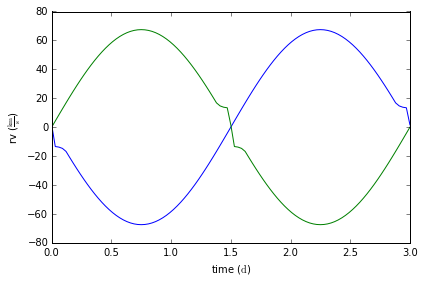

In [17]:
axs, artists = b['RV@model'].plot()

Since these are the only two columns available in the synthetic model, the only other options is to plot in phase instead of time.

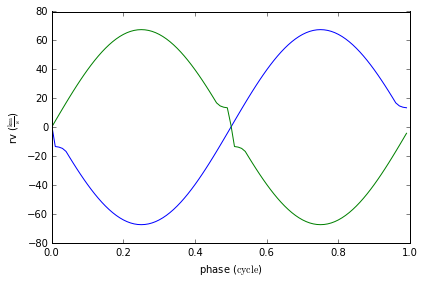

In [18]:
axs, artists = b['RV@model'].plot(x='phase')

In system hierarchies where there may be multiple periods, it is also possible to determine whose period to use for phasing.

In [19]:
b['period'].components

['binary', 'primary', 'secondary']

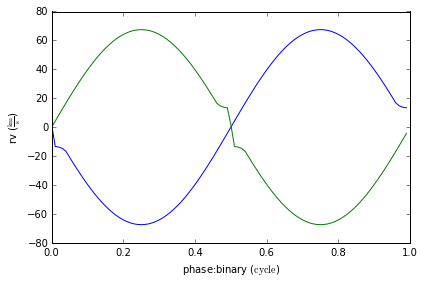

In [20]:
axs, artists = b['RV@model'].plot(x='phase:binary')

Mesh Fields
---------------------

If a MESH dataset exists at any of the same times as the time array in the RV dataset, OR if store_mesh is set to True in the compute options, then radial velocities for each surface element will be available in the model as well (only if mesh_method=='flux_weighted').

Since the radial velocities are flux-weighted, the flux-related quantities are also included.  For a description of these, see the section on the [LC Dataset](LC).

Let's add a single mesh at the first time of the RV dataset and re-call run_compute

In [21]:
b.add_dataset('MESH', time=[0], dataset='mesh01')

<ParameterSet: 2 parameters | contexts: compute, dataset>

In [22]:
b.run_compute()

<ParameterSet: 66 parameters | methods: RV, MESH>

In [23]:
print b['model'].datasets

['mesh01', 'rv01']


These new columns are stored with the RV's dataset tag, but with the MESH method.

In [24]:
b.filter(dataset='rv01', method='MESH', section='model').twigs

['0.0@pblum@primary@rv01@phoebe01@tmpmodel@MESH@model',
 '0.0@intens_norm_abs@primary@rv01@phoebe01@tmpmodel@MESH@model',
 '0.0@ampl_boost@primary@rv01@phoebe01@tmpmodel@MESH@model',
 '0.0@rv@primary@rv01@phoebe01@tmpmodel@MESH@model',
 '0.0@ld@primary@rv01@phoebe01@tmpmodel@MESH@model',
 '0.0@intens_norm_rel@primary@rv01@phoebe01@tmpmodel@MESH@model',
 '0.0@intens_proj_rel@primary@rv01@phoebe01@tmpmodel@MESH@model',
 '0.0@intens_proj_abs@primary@rv01@phoebe01@tmpmodel@MESH@model',
 '0.0@pblum@secondary@rv01@phoebe01@tmpmodel@MESH@model',
 '0.0@intens_norm_abs@secondary@rv01@phoebe01@tmpmodel@MESH@model',
 '0.0@ampl_boost@secondary@rv01@phoebe01@tmpmodel@MESH@model',
 '0.0@rv@secondary@rv01@phoebe01@tmpmodel@MESH@model',
 '0.0@ld@secondary@rv01@phoebe01@tmpmodel@MESH@model',
 '0.0@intens_norm_rel@secondary@rv01@phoebe01@tmpmodel@MESH@model',
 '0.0@intens_proj_rel@secondary@rv01@phoebe01@tmpmodel@MESH@model',
 '0.0@intens_proj_abs@secondary@rv01@phoebe01@tmpmodel@MESH@model']

Any of these columns are then available to use as edge or facecolors when plotting the mesh (see the section on the [MESH dataset](MESH)), but since the MESH elements are stored with the 'mesh01' dataset tag, and the RV (including flux-related) quantities are stored with the 'rv01' dataset tag, it is important not to provide the 'mesh01' dataset tag before plotting.

/home/kyle/.local/lib/python2.7/site-packages/phoebe/frontend/plotting.py:240: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if pckwargs['edgecolors'] in ['none', 'None', None] and pckwargs['facecolors'] not in ['none', 'None', None]:
/home/kyle/.local/lib/python2.7/site-packages/phoebe/frontend/plotting.py:240: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if pckwargs['edgecolors'] in ['none', 'None', None] and pckwargs['facecolors'] not in ['none', 'None', None]:
/usr/local/lib/python2.7/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


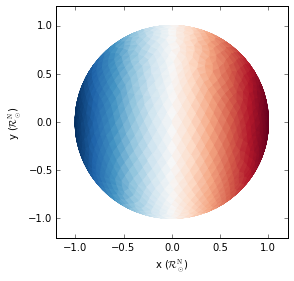

In [25]:
axs, artists = b['MESH@model'].plot(facecolor='rv', edgecolor=None)
# NOT:
# axs, artists = b['mesh01@model'].plot(facecolor='rv', edgecolor=None)

### rv

In [26]:
print b['rv@primary@rv01@MESH@model']

Qualifier: rv
Description: Per-element value for rv01 dataset
Value: [  1.04199468e-01   6.15248593e-16  -1.04199468e-01 ...,  -1.00064907e+00
  -8.87718982e-01  -7.85670196e-01] solRad / d
Constrained by: 
Constrains: None
Related to: None
